# LOGISTIC REGRESSION

In [149]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [150]:
#Datuak path
datuak='./CSV/preprocess.csv'
gorde='./CSV/'

In [151]:
#datuak kargatu
df=pd.read_csv(gorde+'preprocess.csv')
df.head()

,post,Fraudulent
0,marketing intern u ny new york marketing were ...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma u ia wev...,0
3,account executive washington dc u dc washingto...,0
4,bill review manager u fl fort worth spotsource...,0


In [152]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
print(train.shape[0])
print(test.shape[0])

12516
5364


In [153]:

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['post']), tags=[r.Fraudulent]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['post']), tags=[r.Fraudulent]), axis=1)




Doc2Vec errepresentazio desberdinekin probatzeko hurrengo gelaxkan dauden parametro balio desberdinak definitu ditut.

In [154]:
vectorsize=300
#vectorsize=150
mincount=1
#mincount=2

In [155]:
model_dbow = Doc2Vec(dm=0, vector_size=vectorsize, negative=5, hs=0, min_count=mincount, sample = 0)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 12516/12516 [00:00<00:00, 4305413.67it/s]


In [156]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 12516/12516 [00:00<00:00, 3571636.20it/s]


CPU times: user 3min 20s, sys: 1.21 s, total: 3min 21s
Wall time: 1min 9s


In [157]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors 

In [158]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)



print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.9494780014914244
Testing F1 score: 0.9252370750035719


/home/maialen/anaconda3/envs/datumeatzaritza/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [159]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5093
           1       0.50      0.00      0.01       271

    accuracy                           0.95      5364
   macro avg       0.72      0.50      0.49      5364
weighted avg       0.93      0.95      0.93      5364



In [160]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5092,    1],
       [ 270,    1]])

Text(0.5, 257.44, 'Predicted label')

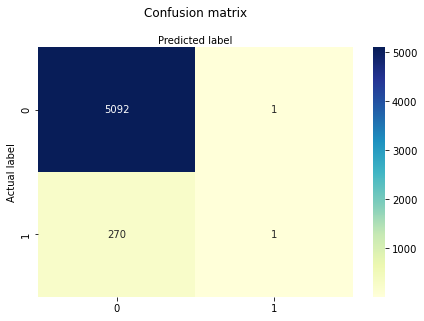

In [161]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [162]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9494780014914244
Precision: 0.5
Recall: 0.0036900369003690036


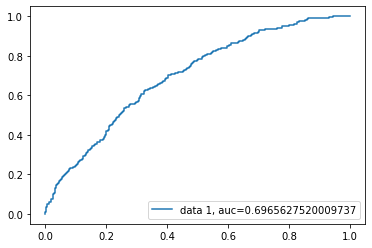

In [163]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# LOGISTIC REGRESION - TFIDF


In [164]:
y=df.Fraudulent.values

In [165]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df.post.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.3, shuffle=True)

In [166]:
#mindf=1
mindf=3

In [167]:

tfv = TfidfVectorizer(min_df=mindf,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)

In [168]:
X_train=xtrain_tfv
y_train=ytrain
X_test=xvalid_tfv
y_test=yvalid
print(X_train.shape[0])
print(X_test.shape[0])

12516
5364


In [169]:


# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [170]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5104,    0],
       [ 174,   86]])

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

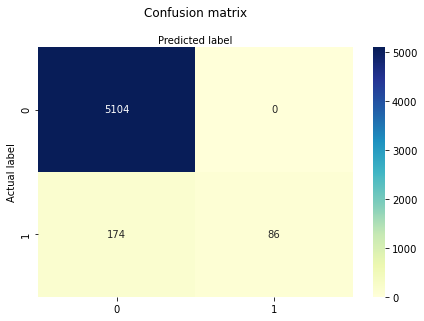

In [172]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [173]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9675615212527964
Precision: 1.0
Recall: 0.33076923076923076


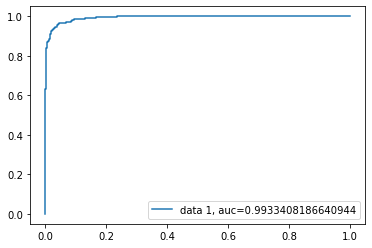

In [174]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [175]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test,y_pred))

Testing accuracy 0.9675615212527964
Testing F1 score: 0.9596768559791113
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5104
           1       1.00      0.33      0.50       260

    accuracy                           0.97      5364
   macro avg       0.98      0.67      0.74      5364
weighted avg       0.97      0.97      0.96      5364



In [ ]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))